In [1]:
import pandas as pd
import numpy as np
from random import randint, random
import colorlover as cl
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%load_ext autoreload
%autoreload 2
plotly.__version__

'3.7.1'

In [2]:
df = pd.DataFrame()
for show in 'stranger things', 'goldbergs', 'glow':
    for season in ' s1', ' s2':
        dx = pd.read_excel('show data highlights.xlsx', sheet_name=f'{show}{season}')
        dx['show'] = f'{show}'
        df = df.append(dx, sort=False, ignore_index=True)

# df.dropna(subset = ['First_week', 'Highest_rank'], inplace=True)
df.fillna({'Highest_rank': 101}, inplace=True)
df['text'] = df.Artist + ': ' + df.Title
df.dropna(subset=['year'], inplace=True)
df.year = df.year.astype(int)

# disabling this for 2d contour maps
# df.year = df.year.apply(lambda x: x + (random())*.3)

In [476]:
# colors_list = ['rgb(129,247,96)', 'rgb(60,114,44)', 'rgb(255,240,30)', 
#                'rgb(160,150,20)', 'rgb(255,30,240)', 'rgb(140,20,140)', 
#                'rgb(7,65,255)', 'rgb(10,40,150)']

colors_list = ['rgb(129,247,96)', 'rgb(255,240,30)', 'rgb(255,30,240)']

line_color = 'rgb(22,77,128)'

traces_list = []

# create a trace for each tv show
for i, show in enumerate(df['show'].unique()):
    dx = df[df['show']==show].drop_duplicates('text')
    artist = dx.Artist
    title = dx.Title
    trace = go.Scatter(
        x = dx.year,
        y = dx.Highest_rank,
        name = show.title(),
        mode = 'markers',
        text = df.loc[df['show']==show, 'text'],
        hoverlabel = dict(namelength = 50),
        marker = dict(
            size = 10,
            sizemode = 'area',
            color = colors_list[i],
            opacity = .6,
            line = dict(
                color = 'black',
                width = 1
            )
        )
    )
    traces_list.append(trace)

# set the layout settings
layout = go.Layout(
    title = go.layout.Title(
        text = 'Billboard Hot-100 Songs by Show',
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(
        color='white'
    ),
    xaxis = dict(
        title = go.layout.xaxis.Title(
            text = 'Release Year'
        ),
        gridcolor=line_color,
        zeroline = False,
        showline = False,
        tickfont=dict(family='Trebuchet MS', size=20, color='white')
    ),
    yaxis = dict(
        title = go.layout.yaxis.Title(
            text = 'Peak Chart Rank'
        ),
        autorange = 'reversed',
        gridcolor=line_color,
        linecolor=line_color,
        zeroline = False,
        tickfont=dict(
            family='Trebuchet MS',
            color='white'
        )
    ),
)

# create subplots
fig = plotly.tools.make_subplots(rows=3, cols=1, shared_xaxes=True, shared_yaxes=True, vertical_spacing=0.1)

# add traces to subplots
for i, trace in enumerate(traces_list):
    fig.append_trace(trace, i+1, 1)

# template for each subplot's y-axis
ytemplate = dict(
    range=[117, -8],
    gridcolor=line_color,
    linecolor=line_color,
    zeroline = False,
    tickvals = [101, 50, 1],
    ticktext = ['Did not chart', '#50', '#1'],
    tickfont=dict(
        family='Trebuchet MS',color='white'
    )
)

# template for each subplot's x-axis
xtemplate = dict(
    tickfont=dict(
        family='Trebuchet MS',
        size=20,
        color='white'
    )
)

# update each subplot's axes with the templates above
fig['layout'].update(height=600, width=800, 
                     yaxis=ytemplate, 
                     yaxis2=ytemplate, 
                     yaxis3=ytemplate,
                     xaxis=xtemplate,
                     xaxis2=xtemplate,
                     xaxis3=xtemplate,
                     legend=dict(font=dict(color='white')),
                     paper_bgcolor = 'rgba(0,0,0,0)', 
                     plot_bgcolor = 'rgba(0,0,0,0)'
                    )

# fig = go.Figure(data=traces_list, layout=layout)
# iplot(fig)
# plot(fig, filename='3 show chart.svg')

import plotly.io as pio
pio.write_image(fig, '3_show_chart.svg')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



In [5]:
contour_list = []

scl = cl.scales['9']['seq']['BuPu']
colorscale = [ [ float(i)/float(len(scl)-1), scl[i] ] for i in range(len(scl)) ]
colorscale

# initialize the figure and set the layout settings that each trace will follow
figure = {
    'data': [],
    'layout': {
        'autosize': False,
        'width': 1200,
        'height': 600,
        'title': 'Hot-100 Song Use in TV Shows',
        'xaxis': {
            'title': 'Year of Release'
        },
        'yaxis': {
            'range': [105, 1],
            'tickvals': [101, 81, 61, 41, 21, 1],
            'ticktext': ['Did not chart', '#81', '#61', '#41', '#21', '#1'],
            'automargin': True,
            'title': 'Peak Chart Rank'
        }
    },
    'frames': []
}

# set slider settings
figure['layout']['sliders'] = {
    'args': [ [None],
        'transition', {
            'duration': 0,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': 'Stranger Things',
    'plotlycommand': 'animate',
    'values': df.show.unique(),
    'visible': True
}

# make play and pause buttons
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1600, 'redraw': True},
                         'fromcurrent': True, 'transition': {'duration': 0, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

# set slider settings
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Show: ',
        'visible': True,
        'xanchor': 'right'
    },
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
data_dict = {
    'x': list(df.loc[df['show']=='stranger things', 'year']),
    'y': list(df.loc[df['show']=='stranger things', 'Highest_rank']),
    'type': 'histogram2dcontour',
    'name': 'stranger things',
    'colorscale': colorscale
}
figure['data'].append(data_dict)

# make frames for the animation
for i, show in enumerate(df['show'].unique()):
    frame = {'data': [], 'name': show.title()}
    dx = df[df['show']==show]
    artist = dx.Artist
    title = dx.Title
    data_dict = {
        'x': list(dx['year']),
        'y': list(dx['Highest_rank']),
        'type': 'histogram2dcontour',
        'colorscale': colorscale,
        'autocontour': True,
        'contours': {
            'coloring': 'fill',
        },
        'xbins': {
            'start': 1975,
            'end': 2020,
            'size': 1
        },
        'nbinsy': 50,
        'zmin': 0,
        'zmax': 7,
        'zmid': 4
    }
    contour_list.append(data_dict)
    frame['data'].append(data_dict)
    figure['frames'].append(frame)
    
    slider_step = {'args': [
        [show.title()],
        {'frame': {'duration': 160, 'redraw': True},
         'mode': 'immediate', 'transition': {'duration': 0}
        }], 'label': show.title(), 'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['sliders'] = [sliders_dict]

# iplot(figure, auto_play=False)
plot(figure, auto_play=False, filename='hist2dcontour.html')

'file://C:\\Users\\ew648\\Documents\\GitHub\\billboard scrape\\hist2dcontour.html'

In [6]:
df.year.unique()

array([1982, 1988, 2013, 1978, 1987, 1981, 2010, 1995, 1985, 1986, 1984,
       1983, 1996, 1980, 2015, 2011, 1993, 1979, 1977, 1989, 1976],
      dtype=int64)

In [306]:
colors_list = ['rgb(129,247,96)', 'rgb(60,114,44)', 'rgb(255,240,30)', 'rgb(160,150,20)', 'rgb(255,30,240)', 'rgb(140,20,140)', 'rgb(7,65,255)', 'rgb(10,40,150)']

cols = df['show'].map(colors_dict)

traces_list = []

for i, show in enumerate(df['show'].unique()):
    dx = df[df['show']==show]
    artist = dx.Artist
    title = dx.Title
    trace = go.Scatter(
        x = dx.First_week,
        y = dx.Highest_rank.astype('int64'),
        name = show.title(),
        mode = 'markers',
        text = df.loc[df['show']==show, 'text'],
        hoverlabel = dict(namelength = 50),
        marker = dict(
            size = 20,
            sizemode = 'area',
            color = colors_list[i],
            opacity = 0.4
        )
    )
    traces_list.append(trace)

legend_trace = go.Scatter(
    x = [0, 0, 0, 0],
    y = sizes,
    text = ['1 week', '13 weeks', '25 weeks', '37 weeks'],
    textposition = ['bottom center', 'middle center', 'middle center', 'middle center'],
    mode = 'markers+text',
    marker = dict(
        size = (sizes + 5)**2,
        sizemode = 'area',
    ),
    xaxis='x2',
    yaxis='y2'
)

layout = go.Layout(
    title = go.layout.Title(
        text = 'Billboard Hot-100 Songs by Show',
    ),
    xaxis = dict(
        title = go.layout.xaxis.Title(
            text = 'First Week on the Chart'
        ),
        domain = [0, 0.85],
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = go.layout.yaxis.Title(
            text = 'Peak Chart Rank (higher ranks are closer to 0)'
        ),
        autorange = 'reversed'
    ),
    xaxis2 = dict(
        domain = [0.85, 1],
        showgrid = False,
        zeroline = False,
        showline = False,
        ticks = '',
        showticklabels = False
    ),
    yaxis2 = dict(
        showgrid = False,
        zeroline = False,
        showline = False,
        ticks = '',
        showticklabels = False
    )
)

fig = plotly.tools.make_subplots(rows=1, 
                                 cols=2, 
#                                  specs=[[{}], [{}]], 
                                 shared_xaxes=False, 
                                 shared_yaxes=False, 
                                 horizontal_spacing = 0.001
                                )

for trace in traces_list:
    fig.append_trace((trace), 1, 1)
fig.append_trace(legend_trace, 1, 2)
fig['layout'].update(layout)

# fig = go.Figure(data=[traces_list[:], legend_trace], layout=layout)
# iplot(fig)
plot(fig, filename='sample chart.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



'file://C:\\Users\\ew648\\Documents\\GitHub\\billboard scrape\\sample chart.html'

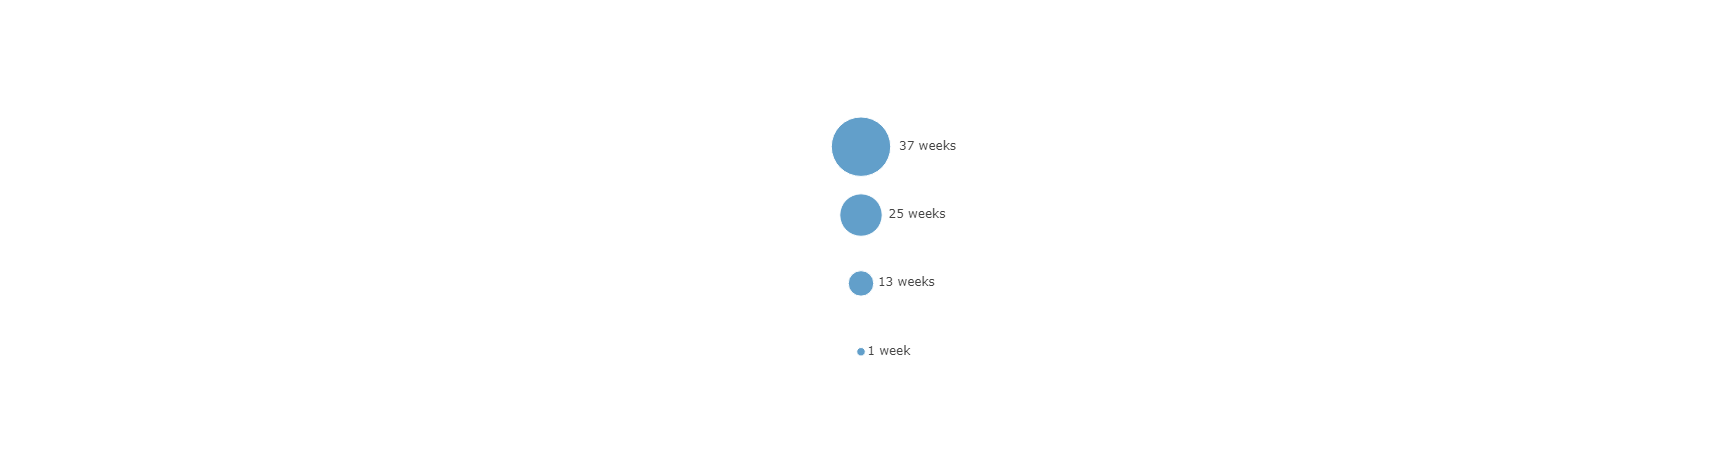

In [248]:
sizes = np.linspace(1, df.Weeks_on_chart.astype('int64').max(), 4, endpoint=True)

legend_trace = go.Scatter(
    x = [0, 0, 0, 0],
    y = sizes,
    text = ['1 week', '13 weeks', '25 weeks', '37 weeks'],
    textposition = 'middle right',
    mode = 'markers+text',
    marker = dict(
        size = (sizes + 5)**2,
        sizemode = 'area',
    )
)

legend_layout = go.Layout(
    yaxis = dict(
        showgrid = False,
        zeroline = False,
        showline = False,
        ticks = '',
        showticklabels = False
    ),
    xaxis = dict(
        showgrid = False,
        zeroline = False,
        showline = False,
        ticks = '',
        showticklabels = False
    )
)

fig = go.Figure([legend_trace], layout=legend_layout)

iplot(fig)

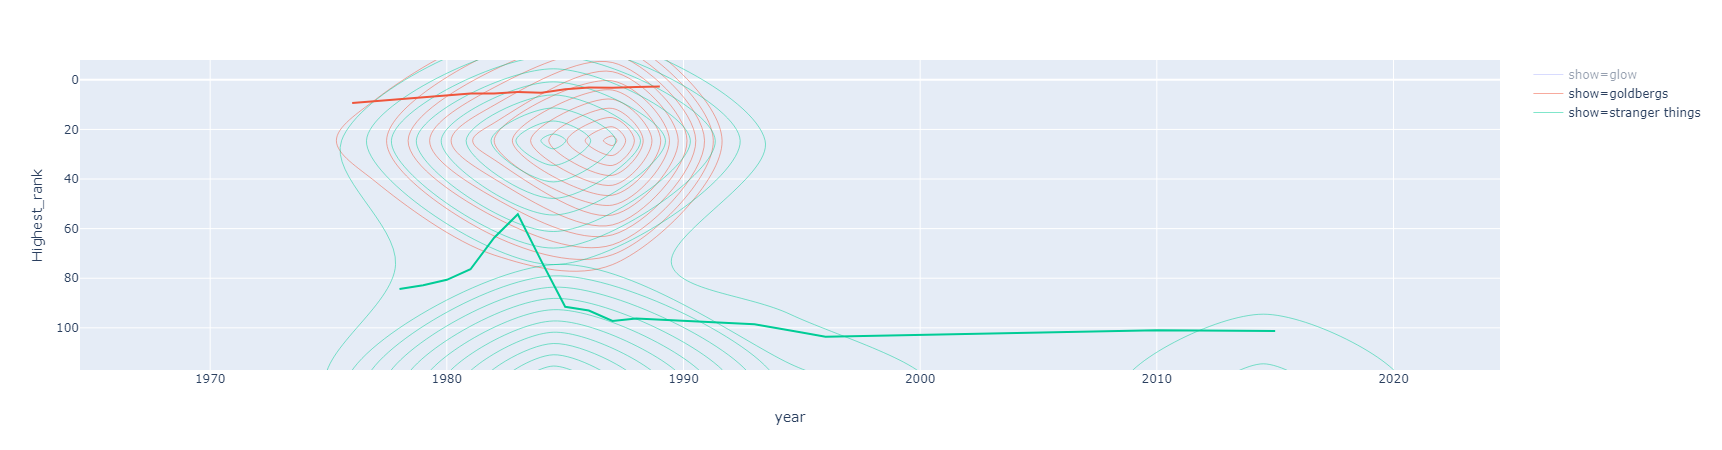

In [470]:
import plotly_express as px

px.density_contour(df, x="year", y="Highest_rank", color="show", category_orders={'show': ['stranger things', 'goldbergs', 'glow']}, range_y=[117,-8], trendline='lowess')